In [110]:
import pandas as pd
wine_df = pd.read_csv('../dataset/winequality-red.csv')

In [111]:
# 查看資料
# wine_df.head(3), wine_df.info()

In [112]:
wine_df['quality'].unique(), wine_df['quality'].value_counts()

(array([5, 6, 7, 4, 8, 3]),
 quality
 5    681
 6    638
 7    199
 4     53
 8     18
 3     10
 Name: count, dtype: int64)

#### 查看分佈長條圖

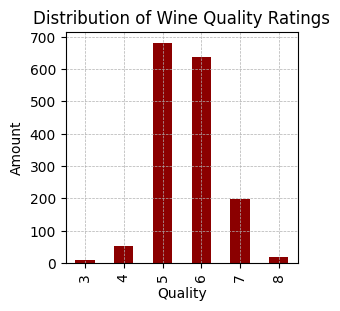

In [113]:
import matplotlib.pyplot as plt
# Plot the distribution of the quality ratings in the dataset
plt.figure(figsize=(3, 3))
wine_df['quality'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

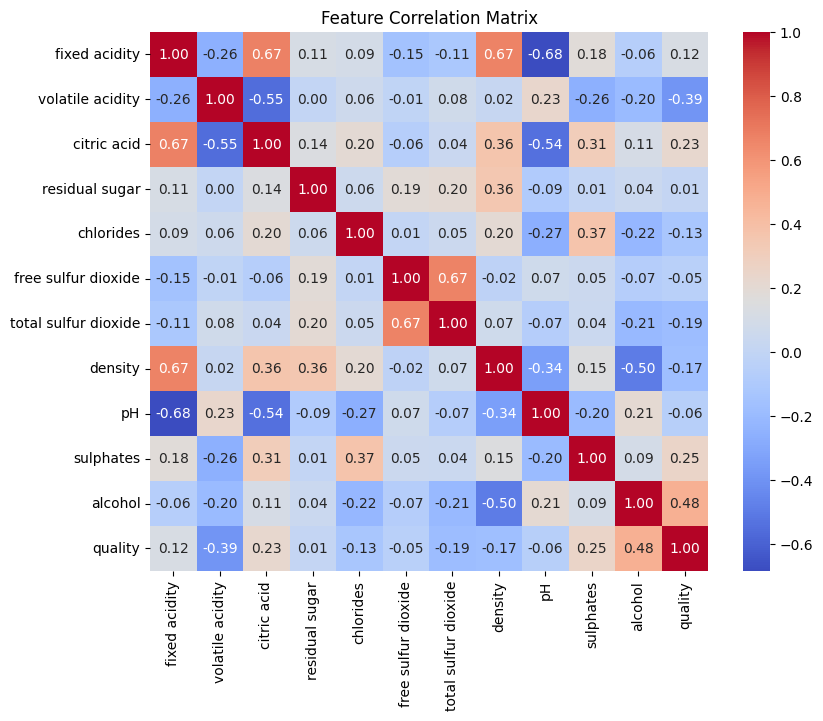

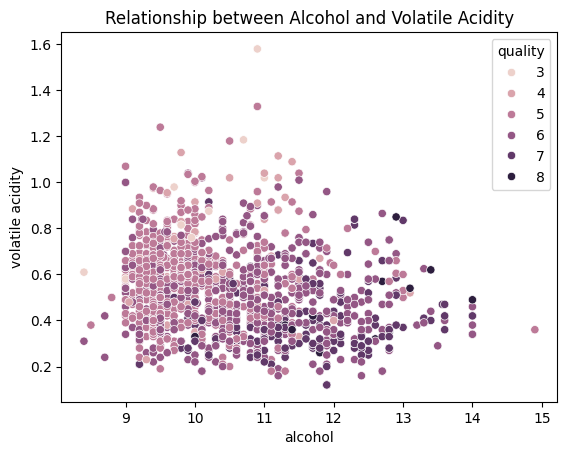

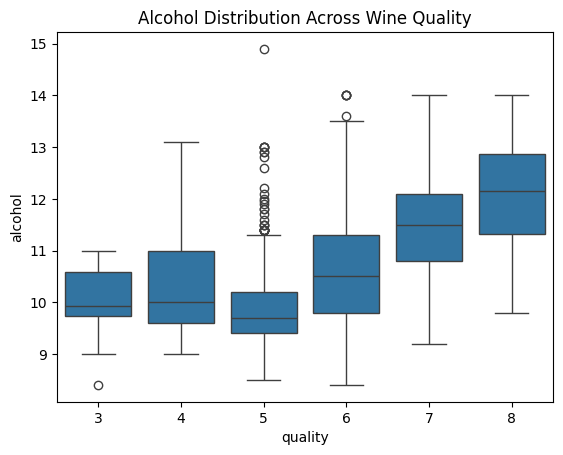

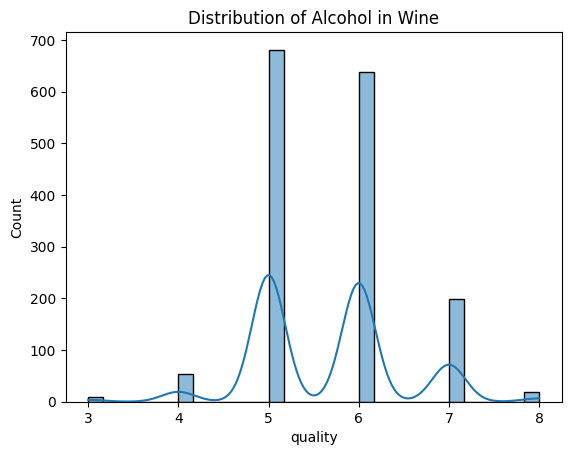

In [114]:
import seaborn as sns

# 熱力圖：顯示特徵相關性
plt.figure(figsize=(9, 7))
sns.heatmap(wine_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 散點圖：查看兩個特徵間關係
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=wine_df)
plt.title('Relationship between Alcohol and Volatile Acidity')
plt.show()

# 箱型圖：查看特徵分佈和異常值
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.title('Alcohol Distribution Across Wine Quality')
plt.show()

# 直方圖：查看特徵分佈
sns.histplot(wine_df['quality'], kde=True)
plt.title('Distribution of Alcohol in Wine')
plt.show()

In [115]:
# 將'quality'小於5者轉 0 ， 小於5者轉 1
wine_df['quality'] = (wine_df['quality'] >= 5).astype(int)
wine_df['quality'].unique(), wine_df['quality'].value_counts()

(array([1, 0]),
 quality
 1    1536
 0      63
 Name: count, dtype: int64)

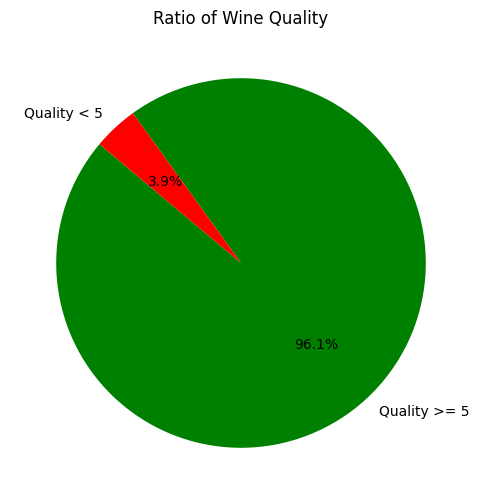

In [116]:
# Calculate the ratio
quality_counts = wine_df['quality'].value_counts()
quality_ratio = quality_counts / quality_counts.sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_ratio, labels=['Quality >= 5', 'Quality < 5'], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Ratio of Wine Quality')
plt.show()

In [117]:
wine_df.to_csv('../newdataset/new_winequality.csv', index=False)

## =====================================================

## Diabetes Dataset

性別（gender）、年齡（age）、高血壓（hypertension）、心臟病（heart_disease）、抽煙歷史（smoking_history）、身體質量指數（bmi）、糖化血紅蛋白水平（HbA1c_level）、血糖水平（blood_glucose_level）和糖尿病診斷（diabetes）。

In [118]:
diabetes_df = pd.read_csv('../dataset/diabetes_prediction_dataset.csv')

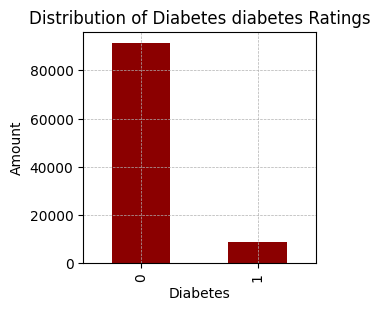

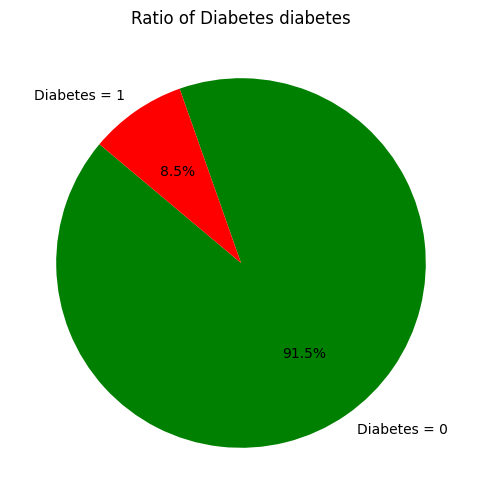

In [119]:
# Plot the distribution of the quality ratings in the dataset
plt.figure(figsize=(3, 3))
diabetes_df['diabetes'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Diabetes diabetes Ratings')
plt.xlabel('Diabetes')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Calculate the ratio
diabetes_counts = diabetes_df['diabetes'].value_counts()
diabetes_ratio = diabetes_counts / diabetes_counts.sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetes_ratio, labels=['Diabetes = 0', 'Diabetes = 1'], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Ratio of Diabetes diabetes')
plt.show()

In [120]:
# Check the unique values in the 'smoking_history' column to ensure correct ordering for Label Encoding
diabetes_df['smoking_history'].unique(), diabetes_df['smoking_history'].value_counts()

(array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
       dtype=object),
 smoking_history
 No Info        35816
 never          35095
 former          9352
 current         9286
 not current     6447
 ever            4004
 Name: count, dtype: int64)

### 進行Encoding作業
---
- 'gender' 做 One Hot Encoding：
沒有自然的排序關係，使用 One-Hot Encoding 可以避免任何算法誤解數字大小或順序。
--
- 'smoking_history_encoded' 做Label Encoding：
存在明確的順序，使用 Label Encoding 可以讓模型理解並利用這種序列信息。

In [121]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 'smoking_history' 做 Label Encoding
label_encoder = LabelEncoder()
smoking_order = ['No Info', 'never', 'not current', 'former', 'ever', 'current']
label_encoder.fit(smoking_order)
diabetes_df['smoking_history_encoded'] = label_encoder.transform(diabetes_df['smoking_history'])
diabetes_df.drop('smoking_history', axis=1, inplace=True) # 移除smoking_history欄位
# 將encoding完成欄位家在heart_disease後（原位置）
smoking_encoded_position = diabetes_df.columns.get_loc('heart_disease') + 1 
diabetes_df.insert(smoking_encoded_position, 'smoking_history_encoded', diabetes_df.pop('smoking_history_encoded'))

# 'gender' 做 One Hot Encoding
onehot_encoder = OneHotEncoder()
gender_encoded = onehot_encoder.fit_transform(diabetes_df[['gender']]).toarray()  # Using .toarray() to handle sparse array
gender_labels = [f'gender_{col}' for col in onehot_encoder.categories_[0]]
for i, col in enumerate(gender_labels):
    diabetes_df.insert(loc=diabetes_df.columns.get_loc('gender') + i, column=col, value=gender_encoded[:, i])
diabetes_df.drop('gender', axis=1, inplace=True)

# Display the updated DataFrame
diabetes_df.head()


,gender_Female,gender_Male,gender_Other,age,hypertension,heart_disease,smoking_history_encoded,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.0,0.0,80.0,0,1,4,25.19,6.6,140,0
1,1.0,0.0,0.0,54.0,0,0,0,27.32,6.6,80,0
2,0.0,1.0,0.0,28.0,0,0,4,27.32,5.7,158,0
3,1.0,0.0,0.0,36.0,0,0,1,23.45,5.0,155,0
4,0.0,1.0,0.0,76.0,1,1,1,20.14,4.8,155,0


In [122]:
diabetes_df.to_csv('../newdataset/new_diabetes.csv', index=False)